In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
# %connect_info
%qtconsole

In [3]:
pwd

'/Users/cgu3/Documents/Grape-Pi/analysis-code'

In [5]:
nextprot_dat = pd.read_csv('/Users/cgu3/Documents/Grape-Pi/data/single/raw/additional/nextprot-proteins.csv')
nextprot_dat.head()

,acc_code,protein_name,gene_name_s,chromosome,proteomics,disease,structure,number_isof,number_variants,number_ptms,mutagenesis,tissue_expr,pe
0,A0A024RBG1,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,1q21.2,yes,no,no,1,0,0,no,yes,Evidence at protein level
1,A0A075B6H7,Probable non-functional immunoglobulin kappa v...,IGKV3-7,2p11.2,yes,no,no,1,187,1,no,yes,Evidence at protein level
2,A0A075B6H8,Probable non-functional immunoglobulin kappa v...,IGKV1D-42,2p11.2,yes,no,no,1,140,1,no,yes,Evidence at protein level
3,A0A075B6H9,Immunoglobulin lambda variable 4-69,IGLV4-69,22q11.22,yes,no,no,1,318,1,no,yes,Evidence at protein level
4,A0A075B6I0,Immunoglobulin lambda variable 8-61,IGLV8-61,22q11.22,yes,no,no,1,256,1,no,yes,Evidence at protein level


In [19]:
dat_spc = pd.read_csv('/Users/cgu3/Library/CloudStorage/OneDrive-InsideMDAnderson/PPI-for-protein-detecthing/data/gastric_primary_cell/gastric_primary_cell_count.csv')
dat_spc.rename(columns={'Unnamed: 0': 'accession'}, inplace=True)
dat_spc = dat_spc[dat_spc['accession'].isin(nextprot_dat['acc_code'])]
dat_spc = dat_spc.drop(['IP0981_1701', 'IP0993_1701'],axis=1)
dat_spc.set_index('accession', inplace=True)
# reliable_positive_proteins = dat_spc[np.sum(dat_spc > 0, axis=1) >= 3].index.to_series()
reliable_positive_proteins = dat_spc[np.sum(dat_spc >= 2, axis=1) >= 3].index.to_series()
# reliable_negative_proteins = dat_spc.index.to_series()[~dat_spc.index.to_series().isin(reliable_positive_proteins)]
reliable_negative_proteins = dat_spc[np.sum(dat_spc <= 1, axis=1) == 6].index.to_series()
# maybe try mRNA

# check overlap between detected proteins in the sample

In [48]:
condition = dat_spc['IP0982_1701'] > 0
with open('../data/single/raw/additional/protein_in_IP0982_1701.txt', 'w') as output:
    output.write('\n'.join(dat_spc.iloc[:, 0][condition].index.to_list()))

44503

In [50]:
for ipas in dat_spc.columns:
    condition = dat_spc[ipas] > 0
    with open('../data/single/raw/additional/protein_in_' + ipas + '.txt', 'w') as output:
        output.write('\n'.join(dat_spc.iloc[:, 0][condition].index.to_list()))

44503

44667

34081

37411

29574

39287

In [19]:
dat_0981 = pd.read_csv('../data/single/raw/protein/combined_protein_7103_processed.csv', index_col=0)

In [20]:
negative_proteins = dat_0981.index.to_series()[~dat_0981.index.to_series().isin(dat_spc.index.to_series())]

In [21]:
reliable_negative_proteins = pd.concat([reliable_negative_proteins, negative_proteins])

NameError: name 'reliable_negative_proteins' is not defined

In [22]:
len(reliable_positive_proteins)
len(reliable_negative_proteins)

5293

NameError: name 'reliable_negative_proteins' is not defined

In [20]:
reliable_positive_proteins
reliable_positive_proteins.to_csv('../data/single/raw/reference/positive.txt', index=False)

accession
A0A096LP55    A0A096LP55
A0A0U1RRL7    A0A0U1RRL7
A0AVT1            A0AVT1
A0FGR8            A0FGR8
A0M8Q6            A0M8Q6
                 ...    
O95857            O95857
P0C875            P0C875
Q9H5Q4            Q9H5Q4
Q9P0K7            Q9P0K7
Q9C0B5            Q9C0B5
Name: accession, Length: 4510, dtype: object

In [21]:
reliable_negative_proteins
reliable_negative_proteins.to_csv('../data/single/raw/reference/negative.txt', index=False)

accession
A0A075B6R2    A0A075B6R2
A0A087X0M5    A0A087X0M5
A0A0B4J1Z2    A0A0B4J1Z2
A0A0C4DH25    A0A0C4DH25
A0A0C4DH31    A0A0C4DH31
                 ...    
Q9UL52            Q9UL52
Q9ULZ0            Q9ULZ0
Q9Y5H9            Q9Y5H9
Q9Y603            Q9Y603
Q9Y6Z2            Q9Y6Z2
Name: accession, Length: 2065, dtype: object

Performance of FDR method in gastric primary cell sample

In [109]:
proteins = pd.read_csv('/Users/cgu3/Library/CloudStorage/OneDrive-InsideMDAnderson/proteomics/project/PPI-for-protein-detection/data/raw-data/processed-combined-protein/combined_protein_7103_processed.csv')
proteins = proteins[proteins['protein.Accession'].isin(nextprot_dat['acc_code'])]
proteins

,protein.Accession,protein.key,protein.Entry,protein.Description,protein.dataBaseType,protein.score,protein.falsePositiveRate,protein.avgMass,protein.MatchedProducts,protein.matchedPeptides,...,protein.top3MatchedPeptideIntenSum,protein.MatchedProductIntenSum,protein.fmolOnColumn,protein.ngramOnColumn,protein.AutoCurate,protein.sumNumBYCalc,protein.sumNumBYPepFrag1,protein.AccessionKey_ForHomologs,protein.Key_ForHomologs,protein.numUniquePeptides
0,A0A075B6I1,71922,A0A075B6I1_HUMAN,Protein IGLV4-60 (Fragment) OS=Homo sapiens GN...,Regular,29.8800,20.82,13200.6299,3,1,...,0.0,672.0,NaN,NaN,Red,4.910510,3,NaN,NaN,0
1,A0A075B6I6,71925,A0A075B6I6_HUMAN,Protein IGLV1-50 (Fragment) OS=Homo sapiens GN...,Regular,60.2326,26.57,12551.8520,4,1,...,0.0,2246.0,NaN,NaN,Red,4.086504,4,NaN,NaN,0
2,A0A075B6K5,71935,A0A075B6K5_HUMAN,HCG2043239 (Fragment) OS=Homo sapiens GN=IGLV3...,Regular,41.5748,32.59,12473.8112,6,2,...,0.0,1132.0,NaN,NaN,Red,5.572281,3,NaN,NaN,0
3,A0A075B6N4,71943,A0A075B6N4_HUMAN,Protein TRBV25-1 (Fragment) OS=Homo sapiens GN...,Regular,146.0436,1.52,13195.8990,3,1,...,0.0,233.0,NaN,NaN,Green,4.525743,3,A0A0G2JMG7 A0A0G2JNG9 A0A1B0GTL4 A0A1B0GWK1 A0...,4752 4882 6490 7274 7432,0
4,A0A075B6P5,71944,KV228_HUMAN,Immunoglobulin kappa variable 2-28 OS=Homo sap...,Regular,368.3212,2.40,13098.8636,9,2,...,0.0,10153.0,NaN,NaN,Yellow,11.621240,9,A0A087WW87 A0A087X0P6 A0A087X0Q4 A0A075B6S2 A0...,1015 2033 2038 71951 71954 72185 75732 75733 7...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13051,Q9Y6Y0,92896,NS1BP_HUMAN,Influenza virus NS1A-binding protein OS=Homo s...,Regular,38.7143,27.16,73292.4738,17,4,...,0.0,22308.0,NaN,NaN,Red,21.051510,5,NaN,NaN,0
13052,Q9Y6Y1,92897,CMTA1_HUMAN,Calmodulin-binding transcription activator 1 O...,Regular,59.6527,29.39,186300.6395,9,3,...,0.0,6350.0,NaN,NaN,Red,18.896200,3,H0YJK7 Q9Y6Y1-2,33044 70337,0
13053,Q9Y6Y8,92898,S23IP_HUMAN,SEC23-interacting protein OS=Homo sapiens GN=S...,Regular,38.0982,32.05,111929.1622,11,3,...,0.0,2268.0,NaN,NaN,Red,28.493000,3,Q9Y6Y8-2,70340,0
13054,Q9Y6Z7,92903,COL10_HUMAN,Collectin-10 OS=Homo sapiens GN=COLEC10 PE=2 SV=2,Regular,40.5395,31.21,31202.3976,3,1,...,0.0,392.0,NaN,NaN,Red,6.394389,3,NaN,NaN,0


In [110]:
proteins['y'] = -1
proteins.loc[proteins['protein.Accession'].isin(list(reliable_positive_proteins)), 'y'] = 1
proteins.loc[proteins['protein.Accession'].isin(list(reliable_negative_proteins)), 'y'] = 0

In [111]:
proteins['y']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
13051   -1
13052    0
13053    1
13054   -1
13055   -1
Name: y, Length: 13054, dtype: int64

In [112]:
proteins['y_by_fdr'] = 0
proteins.loc[proteins['protein.falsePositiveRate'] <= 17, 'y_by_fdr'] = 1

In [113]:
proteins_labeled = proteins[proteins['y'] != -1]

In [114]:
proteins_labeled

,protein.Accession,protein.key,protein.Entry,protein.Description,protein.dataBaseType,protein.score,protein.falsePositiveRate,protein.avgMass,protein.MatchedProducts,protein.matchedPeptides,...,protein.fmolOnColumn,protein.ngramOnColumn,protein.AutoCurate,protein.sumNumBYCalc,protein.sumNumBYPepFrag1,protein.AccessionKey_ForHomologs,protein.Key_ForHomologs,protein.numUniquePeptides,y,y_by_fdr
6,A0A075B6R2,71948,A0A075B6R2_HUMAN,Protein IGHV4-4 (Fragment) OS=Homo sapiens GN=...,Regular,417.5766,2.87,12989.8105,3,1,...,NaN,NaN,Yellow,5.298701,3,NaN,NaN,0,0,1
9,A0A075B6V5,71969,A0A075B6V5_HUMAN,Protein TRAV36DV7 (Fragment) OS=Homo sapiens G...,Regular,247.0453,5.06,12909.9855,9,4,...,NaN,NaN,Green,5.446681,3,NaN,NaN,0,0,1
14,A0A087WUL8,72050,NBPFJ_HUMAN,Neuroblastoma breakpoint family member 19 OS=H...,Regular,31.5360,35.77,451704.3266,7,2,...,NaN,NaN,Red,23.781120,3,A0A075B757 A0A075B761 A0A075B762 A0A087WT85 A0...,143 144 145 301 663 817 830 835 910 986 1542 1...,0,0,0
20,A0A087X0M5,72083,A0A087X0M5_HUMAN,Protein TRBV18 (Fragment) OS=Homo sapiens GN=T...,Regular,641.4063,0.26,13383.3904,12,2,...,NaN,NaN,Green,5.215596,11,NaN,NaN,0,0,1
26,A0A096LP55,72147,QCR6L_HUMAN,Cytochrome b-c1 complex subunit 6-like_ mitoch...,Regular,7007.2970,0.00,11035.9385,16,1,...,NaN,NaN,Green,29.938300,15,P07919,76115,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13045,Q9Y6X3,92890,SCC4_HUMAN,MAU2 chromatid cohesion factor homolog OS=Homo...,Regular,6.8039,41.31,70431.7872,4,1,...,NaN,NaN,Red,5.881503,4,NaN,NaN,0,1,0
13047,Q9Y6X5,92892,ENPP4_HUMAN,Bis(5'-adenosyl)-triphosphatase ENPP4 OS=Homo ...,Regular,22.8700,42.19,52138.5148,7,3,...,NaN,NaN,Green,13.897410,4,NaN,NaN,0,1,0
13049,Q9Y6X8,92894,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2 OS=Homo ...,Regular,22.1998,26.81,93159.6377,11,4,...,NaN,NaN,Green,24.191460,4,NaN,NaN,0,0,0
13052,Q9Y6Y1,92897,CMTA1_HUMAN,Calmodulin-binding transcription activator 1 O...,Regular,59.6527,29.39,186300.6395,9,3,...,NaN,NaN,Red,18.896200,3,H0YJK7 Q9Y6Y1-2,33044 70337,0,0,0


In [115]:
((proteins_labeled['y'] == proteins_labeled['y_by_fdr']).astype(int)).mean()

0.6366078280890253

In [116]:
import sklearn.metrics as metrics
metrics.recall_score(proteins_labeled['y'], proteins_labeled['y_by_fdr'])

0.640754369825207

In [117]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(proteins_labeled['y'], 1- proteins_labeled['protein.falsePositiveRate'])

0.6784369250229991

Text(0.5, 1.0, 'Test ROC')

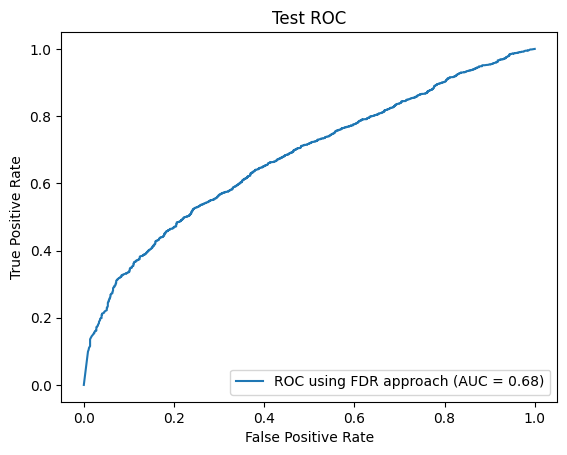

In [118]:
# load numpy array from csv file
import matplotlib.pyplot as plt
%matplotlib inline
roc_auc = metrics.auc(fpr, tpr)
roc_auc
#  # Plotting
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ROC using FDR approach')
roc_display.plot()
plt.title('Test ROC')
plt.show()